# Exercise Sheet 01: Data preprocessing, visualization, correlation, statistical testing, and modeling

**Introduction to Data Mining WS23/24**  
**Bielefeld University**  
**Alina Deriyeva, Benjamin Paaßen**  
**Exercise Sheet Publication Date: 2023-10-23**  
**Exercise Sheet Submission Deadline: 2023-11-03, noon (i.e. 12:00), via git or e-mail to aderiyeva@techfak.uni-bielefeld.de**

**NOTE** The use of language models/AI tools is permitted IF you notify us of the use (just indicate it in the respective task) and are still able to understand and present your results. We also appreciate it if you link to a chatlog of the interaction with the language model/AI tool so that we can understand better how students tend to use these tools.

**PLEASE INDICATE ALL AUTHORS OF THE SUBMISSION IN THIS FIELD**

Edward Lang, Niklas Nebeling

## Preamble: Data set

In this exercise sheet, we investigate first data exploration activities that can be performed on typical, tabular data sets, up to simple statistical testing.

The file `sheet01_data.csv` contains fictional data as might be produced in an educational study. Each row represents a student participating in the study. The first column is just the student index, the second column indicates the experimental condition the student was in (`0` for control group, `1` for intervention group). The third column is the student's test result on a pre-test, the fourth column is the student's test result on a post-test.

The following line loads this raw data and prints it.

In [179]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

X = np.loadtxt('sheet01_data.csv', skiprows = 1, delimiter = '\t')
print(X)

[[  0.   0.  27.  40.]
 [  1.   0.  31.  34.]
 [  2.   0.  30.  nan]
 [  3.   0.  20.  nan]
 [  4.   0.  41.  54.]
 [  5.   0.  39.  51.]
 [  6.   0.  20.  33.]
 [  7.   0.  27.  36.]
 [  8.   0.  79.  83.]
 [  9.   0.  33.  46.]
 [ 10.   0.  22.  29.]
 [ 11.   0.  22.  41.]
 [ 12.   0.  29.  nan]
 [ 13.   0.  25.  nan]
 [ 14.   0.  41.  47.]
 [ 15.   0.  23.  36.]
 [ 16.   0.  17.  30.]
 [ 17.   0.  93. 100.]
 [ 18.   0.  34.  40.]
 [ 19.   0.  23.  27.]
 [ 20.   0.  48.  53.]
 [ 21.   0.  19.  26.]
 [ 22.   0.  28.  33.]
 [ 23.   0.  38.  46.]
 [ 24.   0.  22.  34.]
 [ 25.   0.  34.  45.]
 [ 26.   0.  36.  49.]
 [ 27.   0.  33.  47.]
 [ 28.   0.  40.  41.]
 [ 29.   0.  39.  52.]
 [ 30.   1.  24.  50.]
 [ 31.   1.  38.  62.]
 [ 32.   1.  34.  51.]
 [ 33.   1.  37.  nan]
 [ 34.   1.  31.  44.]
 [ 35.   1.  37.  57.]
 [ 36.   1.  25.  50.]
 [ 37.   1.  23.  37.]
 [ 38.   1.  12.  38.]
 [ 39.   1.  31.  56.]
 [ 40.   1.  36.  46.]
 [ 41.   1.  34.  48.]
 [ 42.   1.  85. 100.]
 [ 43.   1.

### Task 01.01

Write python code to automatically identify outliers, which are defined as any students with a pre-test score higher than 3 standard deviations above the mean. Write python code that removes these outliers from the data set.

In [180]:
X_std = np.std(X[:,2])
X_mean = np.mean(X[:,2])

def identify_outliers(data, No_of_stds=3):
    mean = np.mean(data)
    std = np.std(data)

    limit = mean + No_of_stds * std
    outliers = []

    #iterate over data points and check if they exceed limit
    for x in range(0,data.size):
        if data[x] > limit:
            outliers.append(x)
    return outliers

X_outliers = identify_outliers(X[:,2])

print("Mean:" + str(X_mean))
print("Standard deviation:" + str(X_std))
print("Outliers:")
print(X_outliers)

#removing the outliers

#Filtering the data to only keep pre test score values <= 3 standard deviations
limit = X_mean+3*X_std
X_without_outliers = X[X[:,2]<=limit]

    


Mean:32.9
Standard deviation:14.790424830499855
Outliers:
[8, 17, 42]


Print how many points are left in the control group and the intervention group after outlier removal

In [181]:
#same filter method, but this time applied to the index column since control group index is <= 29
X_control = X_without_outliers[X_without_outliers[:,0]<=29]
X_intervention = X_without_outliers[X_without_outliers[:,0]>29]

print("Points left in the the control group: " + str(len(X_control)))
print("Points left in the the intervention group: " + str(len(X_intervention)))

Points left in the the control group: 28
Points left in the the intervention group: 29


### Task 01.02

Write python code to compute the mean pre- and post-test score, as well as the respective standard deviation, of the Intervention group and the intervention group. Be aware of nan values. Print the results.

In [182]:
#the numpy methods nanmean() and nanstd() compute the respective results by ignoring nan-values
control_pre_mean = np.nanmean(X_control[:,2])
control_pre_std = np.nanstd(X_control[:,2])
control_post_mean = np.nanmean(X_control[:,3])
control_post_std = np.nanstd(X_control[:,3])
intervention_pre_mean = np.nanmean(X_intervention[:,2])
intervention_pre_std = np.nanstd(X_intervention[:,2])
intervention_post_mean = np.nanmean(X_intervention[:,3])
intervention_post_std = np.nanstd(X_intervention[:,3])

print("Control group pre-test mean: " +str(control_pre_mean))
print("Control group pre-test standard deviation: " +str(control_pre_std))
print("Control group post-test mean: " +str(control_post_mean))
print("Control group post-test standard deviation: " +str(control_post_std))
print("Intervention group pre-test mean: " +str(intervention_pre_mean))
print("Intervention group pre-test standard deviation: " +str(intervention_pre_std))
print("Intervention group post-test mean: " +str(intervention_post_mean))
print("Intervention group post-test standard deviation: " +str(intervention_post_std))


Control group pre-test mean: 30.035714285714285
Control group pre-test standard deviation: 8.033332980495095
Control group post-test mean: 40.416666666666664
Control group post-test standard deviation: 8.396014266040497
Intervention group pre-test mean: 30.20689655172414
Intervention group pre-test standard deviation: 9.147750092122058
Intervention group post-test mean: 50.11538461538461
Intervention group post-test standard deviation: 9.069504791319277


### Task 01.03

Write python code to impute the missing values (that means: nan values) in the post test scores by the mean of the data. HOWEVER, the imputation should be done separately for the control and the intervention group.

In [183]:
def impute_missing_values(data, mean, column=3):
    for i in range(0,len(data)):
        if np.isnan(data[i][3]):
            data[i][3] = mean
impute_missing_values(X_control, control_post_mean)
impute_missing_values(X_intervention, intervention_post_mean)

## Data Visualization

### Task 01.04

Display two scatter plots (via `matplotlib.pyplot.scatter`), one for the control group and one for the intervention group, with pre-test score on the x-axis and post-test score on the y-axis. Label the axis and give the plots titles. Interpret these plot: Do you believe that pre- and post-test score correlate?

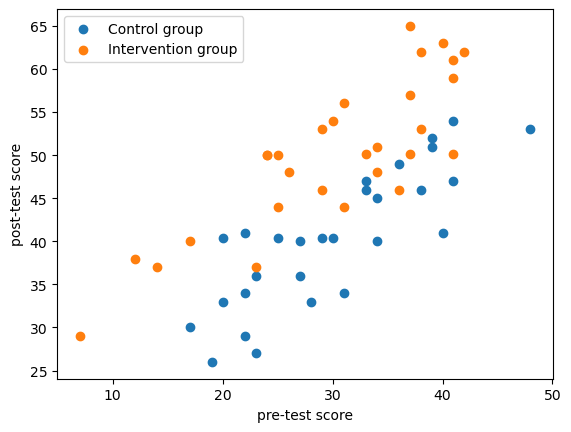

In [184]:
plt.xlabel("pre-test score")
plt.ylabel("post-test score")
plt.scatter(X_control[:,2], X_control[:,3], label="Control group")

plt.xlabel("pre-test score")
plt.ylabel("post-test score")
plt.scatter(X_intervention[:,2], X_intervention[:,3], label="Intervention group")

plt.legend()
plt.show()

Yes, I believe that pre- and post-test scores correlate because post-test scores tend to be higher when pre-test scores are higher and vice versa.

### Task 01.05

Display a bar plot with four bars (with error bars): pre-test mean (and standard error) for control and intervention group; and post-test mean (with standard error) for control and intervention group. Label the axes. Interpret this plot: Where are significant differences, do you think? What is your explanation for these differences?

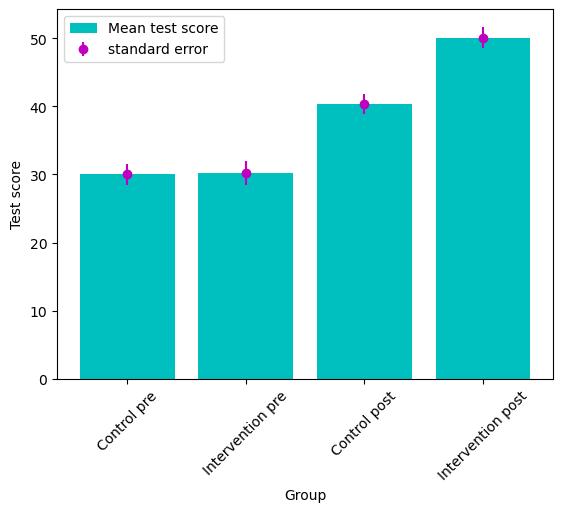

In [185]:
#import math for squareroot function
import math
def standard_error(data):
    return np.std(data)/math.sqrt(len(data))
    
control_pre_standard_error = standard_error(X_control[:,2])
control_post_standard_error = standard_error(X_control[:,3])
intervention_pre_standard_error = standard_error(X_intervention[:,2])
intervention_post_standard_error = standard_error(X_intervention[:,3])

a = ["Control pre", "Intervention pre", "Control post", "Intervention post"]
b = [control_pre_mean, intervention_pre_mean, control_post_mean, intervention_post_mean]
c = [control_pre_standard_error, intervention_pre_standard_error, control_post_standard_error, intervention_post_standard_error]

plt.xlabel("Group")
plt.ylabel("Test score")
plt.bar(a, b, color="c", label="Mean test score")

plt.xticks(["Control pre", "Intervention pre", "Control post", "Intervention post"], rotation=45)
 
plt.errorbar(a, b, yerr=c, fmt="o", color="m", label="standard error")


plt.legend()
plt.show()

I think control pre and intervention pre do not differ.
control post is higher than both control pre and intervention pre because the students learned something between pre- and post-test.
intervention post is even higher than control post because students learned more in the intervention than in the control condition.



### Task 01.06

Display a bar plot with two bars (with error bars): the difference between post- and pre-test score for the control group (with standard error) and for the intervention group (with standard error). Label the axes. Interpret this plot: Do you think the difference of post- and pre-test scores significantly differs between control and intervention group?

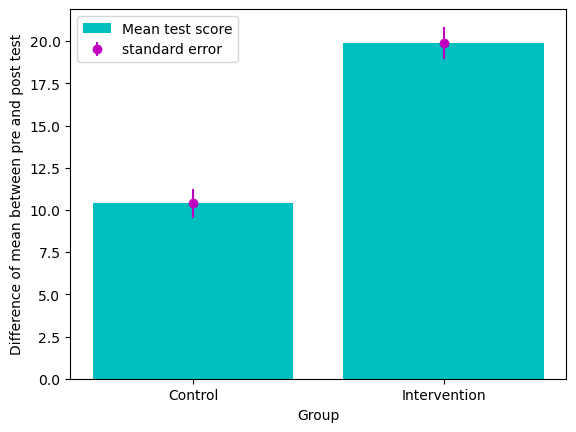

In [186]:
control_differences = abs(X_control[:,2] - X_control[:,3])
intervention_differences = abs(X_intervention[:,2] - X_intervention[:,3])

control_pre_post_diff = np.mean(control_differences)
intervention_pre_post_diff = np.mean(intervention_differences)


a = ["Control", "Intervention"]
b = [control_pre_post_diff, intervention_pre_post_diff]

c = [standard_error(control_differences), standard_error(intervention_differences)]

plt.xlabel("Group")
plt.ylabel("Difference of mean between pre and post test")
plt.bar(a, b, color="c", label="Mean test score")
 
plt.errorbar(a, b, yerr=c, fmt="o", color="m", label="standard error")
plt.legend()
plt.show()

Yes, I think the score difference is significantly higher in the intervention group.

### Task 01.07 (Bonus task)

Display a box plot with four boxes: pre-test results in the control and intervention group, and post-test results in the control and intervention group. Label the axes.

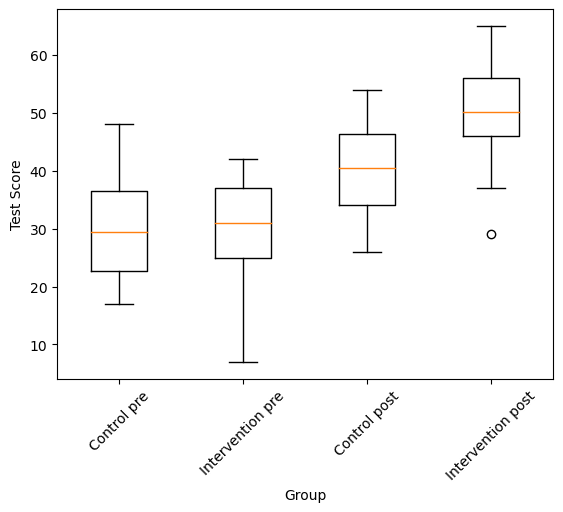

In [187]:
a = ["Control pre", "Intervention pre", "Control post", "Intervention post"]
b = [X_control[:,2], X_intervention[:,2], X_control[:,3], X_intervention[:,3]]


plt.xlabel("Group")
plt.ylabel("Test Score")
plt.boxplot(b)

plt.xticks([1, 2, 3, 4], a, rotation=45)
 
plt.show()

### Task 01.08 (Bonus Task)

Display a box plot with two boxes: difference between post-test and pre-test scores for the control group and the intervention group.

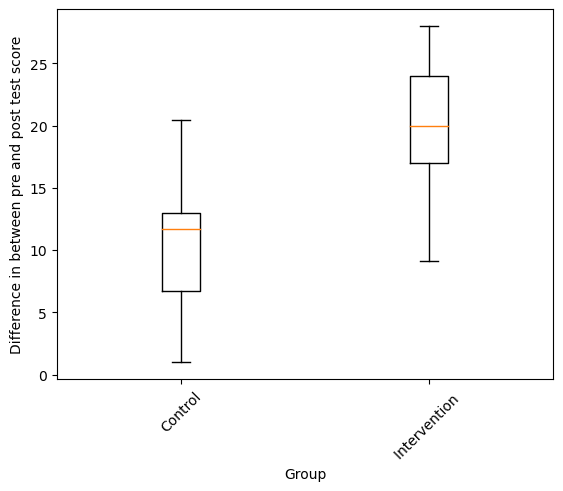

In [188]:
a = ["Control", "Intervention "]
b = [control_differences, intervention_differences]


plt.xlabel("Group")
plt.ylabel("Difference in between pre and post test score")
plt.boxplot(b)

plt.xticks([1, 2,], a, rotation=45)
 
plt.show()

## Statistical Testing

### Task 01.09

Write a python function to compute the Pearson correlation between two arrays of the same size.

In [189]:
def pearson_correlation(x,y):
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    x_std = np.std(x)
    y_std = np.std(y)
    m = len(x)
    r = 0
    for i in range (0,m):
        r += ((x[i]-x_mean)/x_std)*((y[i]-y_mean)/y_std)
    r /= m
    return r

### Task 01.10

Use your function to compute the Pearson correlation between pre-test and post-test scores for both control and intervention condition and print the scores.

Interpret the strength of the correlation using the following rule of thumb from [Mukaka (2012)](https://www.ajol.info/index.php/mmj/article/download/81576/71739):

* A correlation of $0.3 < |r| \leq 0.5$ is considered small.
* A correlation of $0.5 < |r| \leq 0.7$ is considered moderate.
* A correlation of $0.7 < |r| \leq 0.9$ is considered high.
* A correlation of $0.9 < |r| \leq 1.0$ is considered very high.

In [201]:
r_control = pearson_correlation(X_control[:,2], X_control[:,3])
r_intervention = pearson_correlation(X_intervention[:,2], X_intervention[:,3])

print("Pearson correlation between pre and post test:")
print("Control group: " + str(r_control))
print("Intervention group: " + str(r_intervention))

Pearson correlation between pre and post test:
Control group: 0.8332611589015754
Intervention group: 0.837840086591938


<b>Answer:</b> Using the rule of thumb from Mukaka, both of the pearson correlations are to be considered high. The pre test score and the post test score therefore correlate strongly.

Validate your scores by computing the Pearson correlation again with `scipy.stats.pearsonr`. Print both `r` and the `p` value returned by the function for both the control and the intervention condition. Are the correlations statistically significant at $0.01$ level?

In [200]:
import scipy as sp

scipy_correlation_control = sp.stats.pearsonr(X_control[:,2], X_control[:,3])
scipy_correlation_intervention = sp.stats.pearsonr(X_intervention[:,2], X_intervention[:,3])

print("Control group:")
print(scipy_correlation_control.statistic)
print(scipy_correlation_control.pvalue)
print()
print("Intervention group:")
print(scipy_correlation_intervention.statistic)
print(scipy_correlation_intervention.pvalue)

Control Group:
0.8332611589015754
3.7264488593671025e-08

Intervention Group:
0.837840086591938
1.4299228500380605e-08


Since both p values are smaller than 0.01, both correlations are statistically significant at 0.01 level.

### Task 01.11

Write a python function that performs a Welch $t$-test. In particular, your function should:
1. compute the number of data points, the mean, and the standard deviation of both samples (use the `ddof = 1` parameter for the `np.std` function).
2. compute the pooled standard deviation as
\begin{equation}
\sigma_\text{pooled} = \sqrt{\frac{\sigma_x^2}{n_x} + \frac{\sigma_y^2}{n_y}}
\end{equation}
  where $n_x$ and $n_y$ are the number of data points in the two samples and $\sigma_x$ and $\sigma_y$ are the respective standard deviations.
3. compute the $t$-statistic as 
\begin{equation}
t = -\Big|\frac{\mu_x - \mu_y}{\sigma_\text{pooled}}\Big|
\end{equation}
  where $\mu_x$ and $\mu_y$ are the means of the two samples.
4. compute the number of degree of freedom via the Welch-Satterthwaite equation, meaning:
\begin{equation}
\text{df} = \frac{\sigma_\text{pooled}^4}{\frac{\sigma_x^4}{n_x^2\cdot(n_x - 1)} + \frac{\sigma_y^4}{n_y^2\cdot(n_y - 1)}}
\end{equation}
5. compute $p$ as twice the probability of any $t$ value equal or smaller to your value using the `cdf` function of `scipy.stats.t` with the number of freedoms as computed in the previous step.

Your function should return both $t$ and $p$.

In [207]:
def t_test(x,y):
    x_len= len(x)
    y_len = len(y)
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    x_std = np.std(x, ddof=1)
    y_std = np.std(y, ddof=1)

    pooled_std = math.sqrt(x_std**2/x_len+y_std**2/y_len)
    t_statistic = - abs((x_mean-y_mean)/pooled_std)
    df = pooled_std**4/(x_std**4/(x_len**2*(x_len-1))+y_std**4/(y_len**2*(y_len-1)))
    p = 2*sp.stats.t.cdf(t_statistic, df)

    return (t_statistic, p)



### Task 01.12

Write python code to perform the following Welch tests (using your function):
1. the pre-test scores in the control versus the intervention condition
2. the post-test scores in the control versus the intervention condition
3. the differences between post- and pre-test scores in the control versus the intervention condition

For each of the tests, print the $t$ and $p$.

Which of the test results are significant at a $0.01$-level?

**Hint:** You can validate that your function returns the correct $t$ and $p$ values by comparing to the output of the function `scipy.stats.ttest_ind` with `equal_var = False`.

In [208]:
pre_t, pre_p = t_test(X_control[:,2], X_intervention[:,2])
post_t, post_p = t_test(X_control[:,3], X_intervention[:,3])
differences_t, differences_p = t_test(control_differences, intervention_differences)


print("Pre Test Control vs. Intervention Group")
print("t: " + str(pre_t) + " , p: " + str(pre_p))
print("Post Test Control vs. Intervention Group")
print("t: " + str(post_t) + " , p: " + str(post_p))
print("Differences from pre to post test Control vs. Intervention Group")
print("t: " + str(differences_t) + " , p: " + str(differences_p))

-0.0738102614136434
0.9414314685841807
Pre Test Control vs. Intervention Group
t: -0.0738102614136434 , p: 0.9414314685841807
Post Test Control vs. Intervention Group
t: -4.394148531508487 , p: 5.145756436833774e-05
Differences from pre to post test Control vs. Intervention Group
t: -7.318306245054616 , p: 1.1642080318417867e-09


### Task 01.13

Compute the effect sizes for the difference in post-test minus pre-test score between control and intervention condition using the formula

\begin{equation}
d = \frac{|\mu_x - \mu_y|}{\sqrt{\frac{1}{2}(\sigma_x^2 + \sigma_y^2)}}
\end{equation}

where $\mu_x$ and $\mu_y$ are the mean score difference in intervention and control condition and $\sigma_x$ and $\sigma_y$ are the respective standard deviations.

Print the effect size and interpret the size of the effect using the following rule of thumb (by [Sawilowsky (2009)](https://digitalcommons.wayne.edu/cgi/viewcontent.cgi?article=1536&context=jmasm))
* An effect of size $0.01 < d \leq 0.2$ is considered very small.
* An effect of size $0.2 < d \leq 0.5$ is considered small.
* An effect of size $0.5 < d \leq 0.8$ is considered moderate.
* An effect of size $0.8 < d \leq 1.2$ is considered large.
* An effect of size $1.2 < d \leq 2.0$ is considered very large.
* An effect of size $d > 2.0$ is considered huge.

In [213]:
control_diff_mean = np.mean(control_differences)
intervention_diff_mean= np.mean(intervention_differences)
control_diff_std = np.std(control_differences)
intervention_diff_std = np.std(intervention_differences)

d = abs(control_diff_mean - intervention_diff_mean)/(math.sqrt(0.5*(control_diff_std**2+intervention_diff_std**2)))

print("Effect size d = " +str(d))

Effect size d = 1.972042343597396


<b>Answer:</b> The effect size is considered very large and even almost "huge". This means that the intervention seems to have had a significantly positive effect on the students performance in the post-test.

### Task 01.14 (Bonus Task)

Write python code that uses the wilcoxon sign rank test (via `scipy.stats.wilcoxon`) to check whether the post-test scores in the control condition are significantly different from the pre-test scores. Repeat the same analysis for the intervention condition.

In [218]:
control_wilcoxon = sp.stats.wilcoxon(control_differences)
intervention_wilcoxon = sp.stats.wilcoxon(intervention_differences)

print("Control group signed rank statistic: " + str(control_wilcoxon.statistic))
print("Control group signed rank p value: " + str(control_wilcoxon.pvalue))
print()
print("Intervention group signed rank statistic: " + str(intervention_wilcoxon.statistic))
print("Intervention group signed rank p value: " + str(intervention_wilcoxon.pvalue))

Control group signed rank statistic: 0.0
Control group signed rank p value: 7.450580596923828e-09

Intervention group signed rank statistic: 0.0
Intervention group signed rank p value: 3.725290298461914e-09


## Probabilistic Modeling

Let's assume that a student does a test in which they can achieve a certain number of points in the real numbers. Further, assume that the number of points achieved is generated from a Gaussian distribution with standard deviation $\sigma$. However, the mean of the distribution depends on whether the student has understood the topic or not.

### Task 01.15

Formalize this scenario. In particular:
1. Model a random variable $Z$ that indicates whether the student understood the topic or not. What is the domain? What is the probability mass function $p_Z$? What are the parameters of this function?
2. Model a random variable $X$ for the number of points the student achieves on the test. What is the conditional probability density function $p_{X|Z}$? What are the parameters of this function?

**ANSWER**

$\Omega=\{\omega \in \{0,...,100\}^x\}$ \
$\omega_i$ represents the score (0 - 100 for the model) for the i-th student\
$x$ represents the number of students
1. $Z: \Omega \rightarrow \{0,1\}$, the domain includes 0 for "didnt understood the topic", 1 for "understood the topic". \
    $p_Z(Z=0)=$ Probability that a student did not understand the topic \
    $p_Z(Z=1)=$ Probability that a student understood the topic 
2. $X: \Omega \rightarrow \omega_i$, the domain represents the score 0 to 100 for the score on the test. \
    $p_{X|Z}(X, Z)=$ is the probability for a score on the test under the presumption wether a student understood or did not understand the topic 

### Task 01.16

Using Bayes' theorem and the law of total probability, compute the conditional probability mass $p_{Z|X}(1|x)$ for the student having understood the topic given their achieved number of points.

**ANSWER**

***Bayes:*** $P(Z|X) = \frac{P(X|Z)\cdot P(Z)}{P(X)}$ \
***Plug in the values:*** $P(1|X=x) = \frac{P(X=x|Z=1) \cdot P(Z=1)}{P(X=x)}$ \
***Total probability:*** $P(1|X) = \frac{P(X=x|Z=1) \cdot P(Z=1)}{P(X=x|Z=0)*P(Z=0)+P(X=x|Z=1)*P(Z=1)} $

### Task 01.17

Assume that the numbers $x_1, \ldots, x_m \in \mathbb{R}$ are generated (independently) from a Gaussian with mean $\mu$ and standard deviation $\sigma$.

1. What is the negative log likelihood of the data under this assumption?
2. Prove that $\mu$ and $\sigma^2$ which minimize the negative log likelihood are exactly $\mu = \frac{1}{m} \sum_{i=1}^m x_i$ and $\sigma^2 = \frac{1}{m} \sum_{i=1}^m (x_i - \mu)^2$. You may assume that the negative log likelihood is convex, in this case.

**ANSWER**

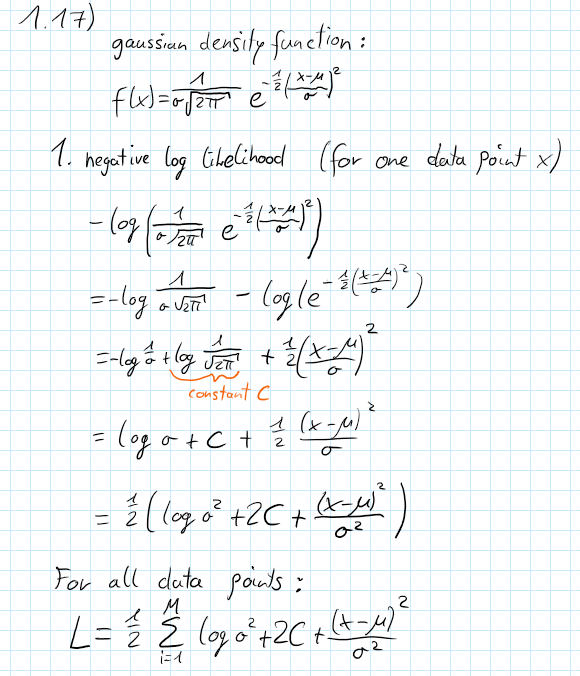